#### import modules and packages

In [23]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime as dt

from onc.onc import ONC

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics

from collections import Counter
from pylab import rcParams


rcParams['figure.figsize'] = 14,6

%matplotlib inline

#### Load data

(245404, 17)

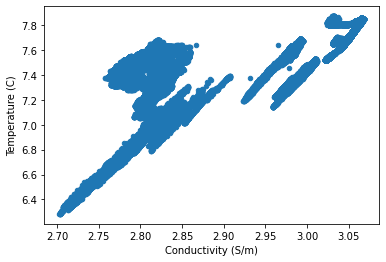

In [24]:
df = pd.read_csv('BaynesSoundMooring_5mbss_ConductivityTemperatureDepth_20200117T030000Z_20200119T235959Z-NaN.csv',skipinitialspace=True)
df.rename(columns={df.columns[0]: 'UTC time', df.columns[1]: 'Conductivity (S/m)',df.columns[15]: 'Temperature (C)'},inplace=True)

fig = df.plot.scatter(x='Conductivity (S/m)',y='Temperature (C)')

df1 = df.iloc[:,[1,15]].values
df.shape

In [25]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df = scaler.fit_transform(df1)

In [26]:
# Converting the numpy array into a pandas DataFrame 
df = pd.DataFrame(df) 

#### Preparing DBSCAN model ( train model and identify outliers)

#### Tuning parameters for DBSCAN

In [5]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

# next, we sort and plot the results
distances = np.sort(distances, axis=0)
distances = distances[:,1]

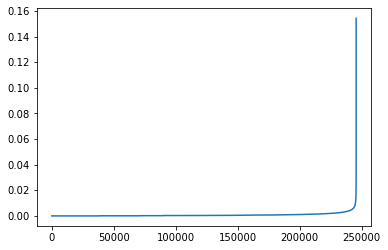

In [6]:
plt.plot(distances)

For epsilon at: 5e-05 Total cluster number:473
For epsilon at: 5.2631578947368424e-05 Total cluster number:473
For epsilon at: 5.5263157894736845e-05 Total cluster number:473
For epsilon at: 5.789473684210527e-05 Total cluster number:473
For epsilon at: 6.052631578947369e-05 Total cluster number:473
For epsilon at: 6.31578947368421e-05 Total cluster number:473
For epsilon at: 6.578947368421052e-05 Total cluster number:473
For epsilon at: 6.842105263157895e-05 Total cluster number:473
For epsilon at: 7.105263157894737e-05 Total cluster number:473
For epsilon at: 7.368421052631579e-05 Total cluster number:473
For epsilon at: 7.631578947368421e-05 Total cluster number:473
For epsilon at: 7.894736842105263e-05 Total cluster number:473
For epsilon at: 8.157894736842105e-05 Total cluster number:473
For epsilon at: 8.421052631578948e-05 Total cluster number:473
For epsilon at: 8.68421052631579e-05 Total cluster number:473
For epsilon at: 8.947368421052632e-05 Total cluster number:473
For epsi

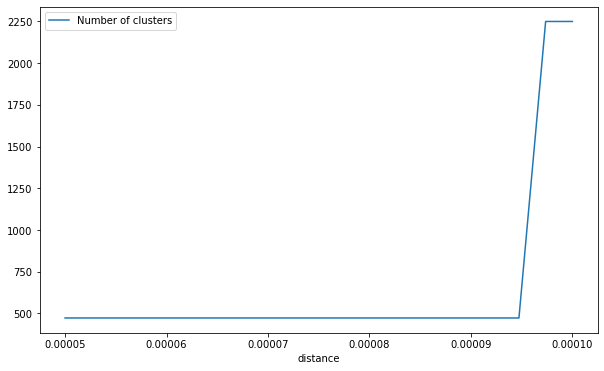

In [35]:
pP = []
qQ = []
rR = []

for i in np.linspace(0.00005,0.001,20):
    db = DBSCAN(eps=i).fit(df)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    label1 = set([label for label in labels if label >= 0]) # to print
    print("For epsilon at: " + str(i), "Total cluster number:" + str(len(set(label1))))

    
    sum = 0
    for t in labels:
        if t == -1: 
            sum = sum + 1
    rR.append(sum)
            
    
    
    pP.append(i)
    qQ.append(int(n_clusters_))
    

results = pd.DataFrame([pP,qQ,rR]).T
results.columns = ['distance','Number of clusters','Number of outliers']
results.plot(x='distance',y='Number of clusters',figsize=(10,6))

For Min_samples at: 100 Total cluster number:28
For Min_samples at: 101 Total cluster number:28
For Min_samples at: 102 Total cluster number:27
For Min_samples at: 103 Total cluster number:23
For Min_samples at: 105 Total cluster number:21
For Min_samples at: 106 Total cluster number:21
For Min_samples at: 107 Total cluster number:17
For Min_samples at: 108 Total cluster number:17
For Min_samples at: 110 Total cluster number:18
For Min_samples at: 111 Total cluster number:18
For Min_samples at: 112 Total cluster number:18
For Min_samples at: 114 Total cluster number:19
For Min_samples at: 115 Total cluster number:18
For Min_samples at: 116 Total cluster number:17
For Min_samples at: 117 Total cluster number:15
For Min_samples at: 119 Total cluster number:12
For Min_samples at: 120 Total cluster number:12
For Min_samples at: 121 Total cluster number:12
For Min_samples at: 123 Total cluster number:10
For Min_samples at: 124 Total cluster number:9
For Min_samples at: 125 Total cluster num

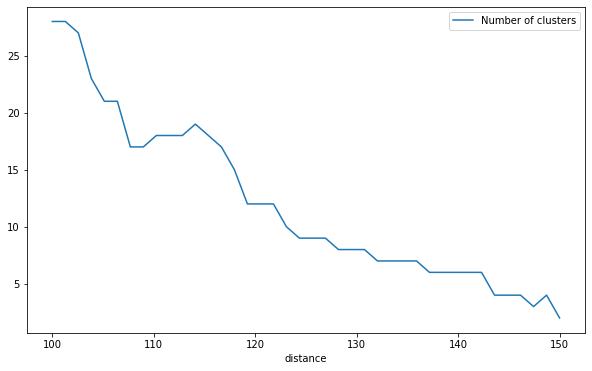

In [47]:
pP = []
qQ = []
rR = []

for i in np.linspace(100,150,40):
    db = DBSCAN(eps = 0.001, min_samples =int(i)).fit(df)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    label1 = set([label for label in labels if label >= 0]) # to print
    print("For Min_samples at: " + str(int(i)), "Total cluster number:" + str(len(set(label1))))
    
    sum = 0
    for t in labels:
        if t == -1: 
            sum = sum + 1
    rR.append(sum)
            
    
    
    pP.append(i)
    qQ.append(int(n_clusters_))
    
    

results = pd.DataFrame([pP,qQ,rR]).T
results.columns = ['distance','Number of clusters','Number of outliers']
results.plot(x='distance',y='Number of clusters',figsize=(10,6))

In [57]:
db = DBSCAN(eps = 0.001, min_samples =137).fit(df)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
label1 = set([label for label in labels if label >= 0]) # to print
print("For Min_samples at: " + str(int(i)), "Total cluster number:" + str(len(set(label1))))

For Min_samples at: 150 Total cluster number:6


The number of clusters in our dataset is 2. Remember that the number of clusters does not include outliers/noise in the dataset.

In [58]:
frame = pd.DataFrame(labels)
frame['cluster'] = labels

frame['cluster'].value_counts()

-1    244246
 3       235
 1       223
 4       189
 0       186
 2       181
 5       144
Name: cluster, dtype: int64